In [1]:
# You must run this cell, but you can ignore its contents.

import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

In [2]:
import pandas as pd

Let's get started by making a sample dataframe with fake data:

In [3]:
sample_df = pd.DataFrame({'number':[1,2,3,234,2,3,2,2,1,2], 'color':['blue','blue','red','red','red','blue','blue','red','green','yellow']})
display(sample_df)

,number,color
0,1,blue
1,2,blue
2,3,red
3,234,red
4,2,red
5,3,blue
6,2,blue
7,2,red
8,1,green
9,2,yellow


## Q1 Create a Series named `condition` which is true for all rows where the color is red

In [4]:
condition = sample_df["color"]=="red"

In [5]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(condition)=='28612bf01a'

## Q2 Create a new `DataFrame` named `red_sample_df` which contains only the rows with red color from `sample_df`.

Hint: use your `condition` Series from above.

In [6]:
red_sample_df = sample_df[ condition ]

In [7]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(red_sample_df)=='354bd7ec89'
assert ads_hash(sample_df)=='21692a4d62'

Now let's use the DataFrame `.groupby()` method to find the mean value of `number` for each `color`. (Hint: this will be useful later in this exercise.)

In [8]:
for color, gdf in sample_df.groupby('color'):
    mean_number = gdf["number"].mean()
    print(f"{color} {mean_number}")

blue 2.0
green 1.0
red 60.25
yellow 2.0


# Using Pandas to work with real data

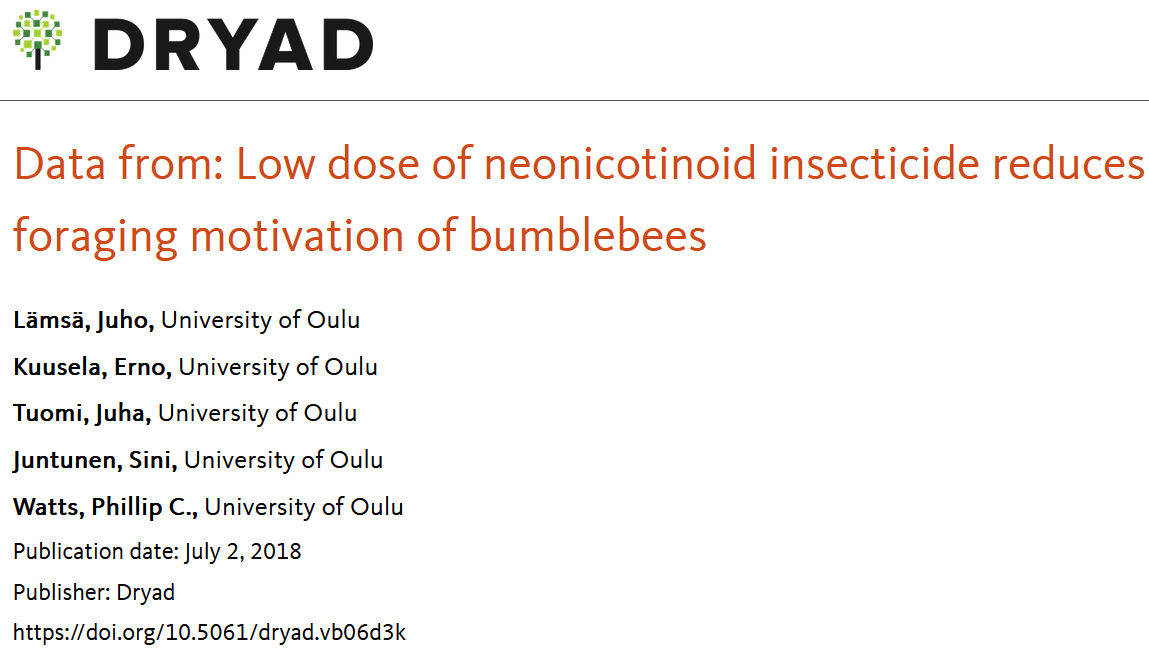

## Get the CSV file and upload it to Jupyter

* Go to https://datadryad.org/stash/dataset/doi:10.5061/dryad.vb06d3k and download the data by clicking "Download Dataset".
 * Check that now have a file called `doi_10.5061_dryad.vb06d3k__v1.zip` about 99KB in size in your Downloads.
 * Unzip this file, which should create:
   - `spectra.csv`
   - `data_onevalueperbee.csv`
   - `data_visitationsequence.csv`
 * We are going focus on the file `data_onevalueperbee.csv`. Upload this file to your Jupyter server using the `Upload` button in the file view. Upload it into the same directory as this `.ipynb` file. Alternatively, if you are running this on your own computer, you can copy this `.csv` file into the directory with your `.ipynb` file.

## Look at the file

As we have covered, CSV stands for "Comma separated values" and is one of the most widely used file formats for scientific data. CSV files are typically like tables, potentially with column names in the first line. The lines of the file are then rows of the table. Spreadsheet programs can open most CSV files, sometimes with a few settings being required to deal with various CSV dialects.

Let's take a look at this CSV file. This is mostly a repitition of what we recently looked at. We open the CSV file read the first few lines.

In [9]:
# Open the file in Python. The variable `fd` will be assigned the open file object.
fd = open('data_onevalueperbee.csv', mode="rb")

# Iterate over the lines in the file, also creating an integer called `line_number` via the
# use of the `enumerate()` function.
for (line_number, line) in enumerate(fd.readlines()):
    # Print each line.
    print(line)
    if line_number >= 3:
        # Stop after a few lines
        break
# Close the open file object.
fd.close()

b'bee;nest;treatment;tstartforaging;logtstartforaging;maxminusstarttime;sumfeedingtime;logsumfeedingtime;numberofvisitations;sumdistcovered;meanvisitduration;revisitations;countyellow;countorange;countblue;visitblue;visitorange;visityellow;allcolorsvisited;averagedistance;meanspeed;sumflowersvisited;visitspatchA;visitspatchB;visitspatchC;patchesvisited;allpatchesvisited;visitsperpatchrounded\r\n'
b'201531004;3;control;815;2.911157609;1965;80;1.903089987;21;1287.688282;3.80952381;4;14;4;3;1;1;1;1;80.4805176;2.767026543;12;6;13;2;3;1;7\r\n'
b'201531005;3;control;108;2.033423755;;1;0;1;;1;0;1;0;0;0;0;1;0;;;1;1;0;0;1;0;0\r\n'
b'201531006;3;control;90;1.954242509;788;136;2.133538908;56;2787.280939;2.428571429;9;41;10;5;1;1;1;1;60.5930639;4.572772117;21;9;25;22;3;1;19\r\n'


So, note that instead of a comma (`,`) separating the columns, we have a semicolon (`;`) instead. So we will need to use this when calling the Pandas `read_csv()` function. Thus, we must use the `sep=';'` keywoard argument. Also, this CSV file has some slightly unusual characters in it. From trial and error, I have learned that it must be opened with a `encoding='latin_1'` keyword argument to `read_csv()`.

## Q3. Read the file `data_onevalueperbee.csv`? Into a dataframe named `df`.

Hint: use the `read_csv` function not only with the filename as the required first positional argument, but also with the keyword arguments described above.

In [10]:
df = pd.read_csv('data_onevalueperbee.csv', sep=';', encoding='latin_1')

In [11]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(df)=='15994f5b0e'

In [12]:
# Let's look at the first few lines of the file with the pandas DataFrame `.head()` method:

df.head()

,bee,nest,treatment,tstartforaging,logtstartforaging,maxminusstarttime,sumfeedingtime,logsumfeedingtime,numberofvisitations,sumdistcovered,...,allcolorsvisited,averagedistance,meanspeed,sumflowersvisited,visitspatchA,visitspatchB,visitspatchC,patchesvisited,allpatchesvisited,visitsperpatchrounded
0,201531004,3,control,815,2.911158,1965.0,80,1.903090,21,1287.688282,...,1,80.480518,2.767027,12,6,13,2,3,1,7
1,201531005,3,control,108,2.033424,NaN,1,0.000000,1,NaN,...,0,NaN,NaN,1,1,0,0,1,0,0
2,201531006,3,control,90,1.954243,788.0,136,2.133539,56,2787.280939,...,1,60.593064,4.572772,21,9,25,22,3,1,19
3,201531101,3,control,1,0.000000,320.0,61,1.785330,16,578.355534,...,1,72.294442,3.651351,7,0,15,1,2,0,5
4,201531102,3,control,0,0.000000,656.0,258,2.411620,49,2845.622453,...,1,71.140561,6.307130,18,4,24,21,3,1,16


## Q4. How many rows of data are in the dataframe you read from the file `data_onevalueperbee.csv`? Put the answer in a variable `num_rows`.

Hint: you can use `len(df)` to calculate the number of rows in the DataFrame `df`.

In [13]:
# Type your answer here and then run this and the following cell.
num_rows = len(df)
print(num_rows)

159


In [14]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(num_rows)=='ff2ccb6ba4'

## Q5. What are the unique values of the `nest` column?

Put your answer in the variable `unique_nests`. Hint: use the `.unique()` method on the Series for the `nest` column.

In [15]:
unique_nests = df['nest'].unique()
print(unique_nests)

[ 3  4  6  8  9 10]


In [16]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(unique_nests)=='59e69ce283'

## Q6. What are the unique values of the `treatment` column?

Put your answer in the variable `unique_treatments`.

In [17]:
unique_treatments = df['treatment'].unique()
print(unique_treatments)

['control' 'imidacloprid']


In [18]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(unique_treatments) == '670c49c25a'

Now let's check which nests are in each treatment:

In [19]:
for treatment, gdf in df.groupby('treatment'):
    print(treatment)
    print(gdf['nest'].unique())
    print()

control
[3 4 8]

imidacloprid
[ 6  9 10]



## Q7. Now make a `seaborn` `boxplot` of the time to start foraging (`tstartforaging` in the CSV file) on the `y` axis, `nest` number on the `x` axis, and with the color (`hue`) being the `treatment`. Save the plot to a file named `Figure2a.png`.

Your plot should look like: 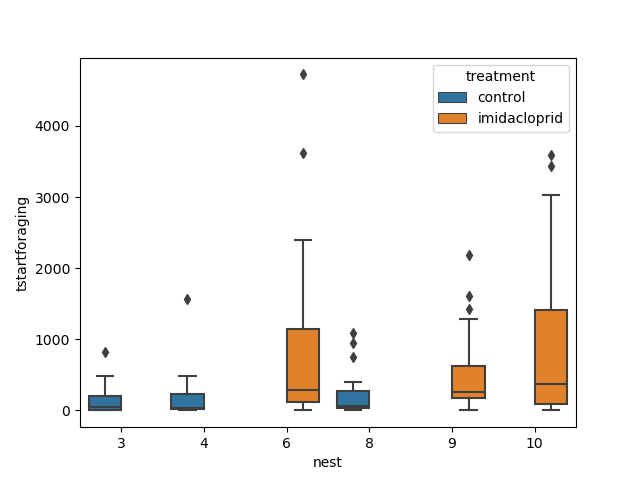

Check the left panel of [Figure 2a](https://royalsocietypublishing.org/doi/10.1098/rspb.2018.0506#RSPB20180506F2) from the Lämsä et al. *Proc. Roy Soc B.* 2018 paper. Do you see any similarities or differences with your plot?

Hint: import seaborn and call its `boxplot()` function with `data`, `x`, `y`, `hue` keyword arguments with values `df`, `nest`, `tstartforaging`, `treatment`.

In [20]:
# Run this cell to import seaborn
import seaborn as sns

<Axes: xlabel='nest', ylabel='tstartforaging'>

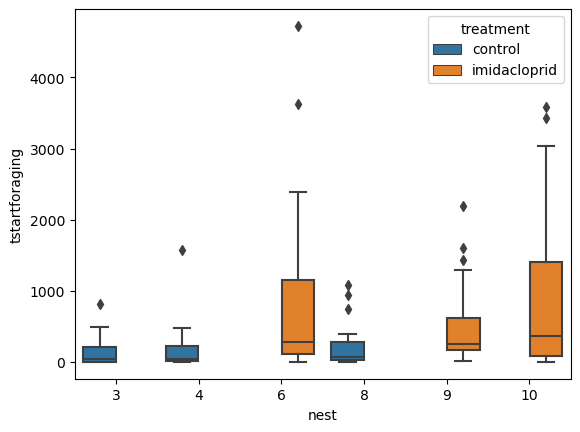

In [21]:
sns.boxplot(data=df,x='nest',y='tstartforaging',hue='treatment')

## Q8. Now make a plot using a single line using seaborn's `boxplot` function which shows the duration of the foraging period on the y axis.

This should be fairly similar to the second panel in [Figure 2a](https://royalsocietypublishing.org/doi/10.1098/rspb.2018.0506#RSPB20180506F2) from the Lämsä et al. Proc. Roy Soc B. 2018 paper.

Hint: the duration of the foraging period is in the `'maxminusstarttime'` column.

<Axes: xlabel='nest', ylabel='maxminusstarttime'>

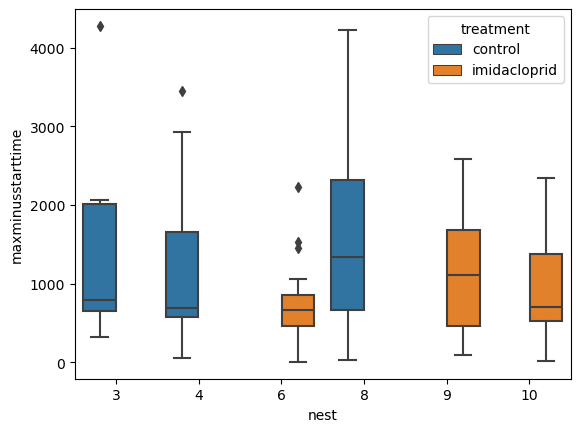

In [22]:
# Type your answer here
sns.boxplot(data=df,x='nest',y='maxminusstarttime',hue='treatment')

## Q9. Make a dictionary called `mean_duration_of_foraging_by_treatment`. Fill this with items whose keys are treatment strings (`'control'` and `'imidacloprid'`) and whose values are the mean of all `'maxminusstarttime'` values for rows in which the `treatment` variable is the same as the key. 

Hint: use `groupby` to group on the `treatment` column and use the `.mean()` method on the `maxminusstarttime` Series within each group data frame. Store each mean as the value in your dictionary for the key.

In [23]:
mean_duration_of_foraging_by_treatment = {}

for treatment, gdf in df.groupby('treatment'):
    print(treatment)
    print(gdf['maxminusstarttime'].mean())
    print()
    mean_duration_of_foraging_by_treatment[treatment] = gdf['maxminusstarttime'].mean()
    
print(mean_duration_of_foraging_by_treatment)

control
1394.4603174603174

imidacloprid
910.8152173913044

{'control': 1394.4603174603174, 'imidacloprid': 910.8152173913044}


In [24]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash([(k,int(round(v))) for (k,v) in mean_duration_of_foraging_by_treatment.items()]) == '14fe49a61a'

## Q10. Make a dictionary `num_unique_bees_per_nest` which has key-value pairs of nest number and the number of unique bees from that nest.

Hint use `.groupby` on the `'nest'` column.

In [25]:
num_unique_bees_per_nest = {}
for nest, gdf in df.groupby('nest'):
    num_unique_bees_per_nest[nest] = len(gdf['bee'].unique())
print(num_unique_bees_per_nest)

{3: 8, 4: 23, 6: 37, 8: 34, 9: 33, 10: 24}


In [26]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(num_unique_bees_per_nest)=='ddc47911c0'